In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We would like to optimise the fundtion below 
$$
f = -\exp(-(x_1 x_2 - 1.5)^2-(x_2-1.5)^2),
$$
Using gradient descent algorithms. The starting point will be placed at $x_0 = [2.5 , 0.5]$. 


The funstion is plotted below;

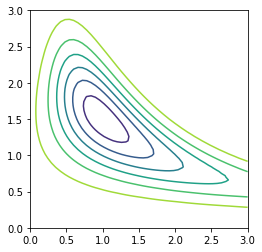

In [44]:
# plot the function
nx = 50
ny = 50
# Geometrie
x = np.linspace(0,3,nx+1);
y = np.linspace(0,3,ny+1);
X, Y = np.meshgrid(x, y,indexing = 'ij')


F = -np.exp(-(X*Y - 1.5)**2-(Y-1.5)**2)

# plot the function
plt.contour(X,Y,F)
plt.axis('image')
plt.show()

First define the function and the gradient symbolically 

In [51]:
x1, x2, alpha = sp.symbols('x1 x2 alpha', real=True)    # Creating the variables
f             = -sp.exp(-(x1*x2 - 1.5)**2-(x2-1.5)**2)  # Function to minimize
gradf         = sp.Matrix([f.diff(x1), f.diff(x2)])     # Function Gradient

## Steepest descent 

Initialise the problem

In [84]:
x = sp.Matrix([2.5, 0.5])        # First initial guess
eps = 1e-1                       # Precision
stepDiffTab = np.array([])      
stepDiff = 1                     # Difference between 2 steps, init at 1 for the loop
stepCounter = 0                  # Number of steps

The optimisation loop

In [85]:
trajectory_sd  = np.array([[2.5],[0.5]])                  # Trajectory of x


while  ((stepDiff > eps) and (stepCounter < 100)) :  
    
 
    # Calculating dk
    g     = sp.Matrix(gradf.subs(x1, x[0]).subs(x2, x[1])) 
    normg = np.linalg.norm(np.array([g[0], g[1]], dtype=float))
    d     = -g/normg
    
    x     = x + d
    
    # Keeping x values
    trajectory_sd = np.hstack((trajectory_sd, x))
    stepDiffTab = np.append(stepDiffTab,stepDiff)
    print('x = ', x)
    stepCounter += 1

x =  Matrix([[2.57669649888474], [1.49705448550158]])
x =  Matrix([[2.07415092053874], [0.632503768837202]])
x =  Matrix([[2.16832826784598], [1.62805920539218]])
x =  Matrix([[1.57892166248729], [0.820222678884775]])
x =  Matrix([[1.74414827351315], [1.80647830853102]])
x =  Matrix([[1.06075403833065], [1.07642877643109]])
x =  Matrix([[1.49336285335571], [1.97801050492974]])
x =  Matrix([[0.757871861991741], [1.30047600276587]])
x =  Matrix([[1.50820591040275], [1.96153486232011]])
x =  Matrix([[0.776017167475074], [1.28043307497112]])
x =  Matrix([[1.50293514450309], [1.96715736802729]])
x =  Matrix([[0.769589164973282], [1.28730174048018]])
x =  Matrix([[1.50469595649023], [1.96525306990262]])
x =  Matrix([[0.771738274377452], [1.28497883385376]])
x =  Matrix([[1.50409491311973], [1.96590008751685]])
x =  Matrix([[0.771004886395467], [1.28576847325574]])
x =  Matrix([[1.50429860253411], [1.96568047187879]])
x =  Matrix([[0.771253449251393], [1.28550049330788]])
x =  Matrix([[1.5042

minimum of f : x =  Matrix([[0.771190405989020], [1.28556842708678]])


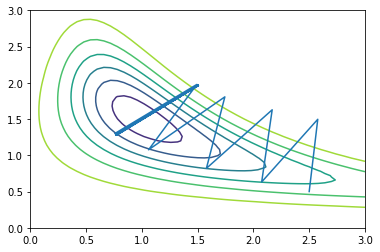

In [86]:
print('minimum of f : x = ', x)

plt.contour(X,Y,F)
plt.plot(trajectory_sd[0], trajectory_sd[1])

## Gradient descent with line search

Initialise the problem

In [88]:
x = sp.Matrix([2.5, 0.5])        # First initial guess
eps = 1e-3                       # Precision
stepDiffTab = np.array([])      
stepDiff = 1                     # Difference between 2 steps, init at 1 for the loop
stepCounter = 0 

Optimisation Loop

In [89]:
searchSpace    = np.linspace(0.0, 1.0, num=100)           # Line-search range
alphaSpace     = np.zeros(len(searchSpace))               # Line-search results
trajectory_ls  = np.array([[2.5],[0.5]])                  # Trajectory of x


while ((stepDiff > eps) and (stepCounter < 100)):  
    
 
    # Calculating dk
    g = sp.Matrix(gradf.subs(x1, x[0]).subs(x2, x[1]))
    normg = np.linalg.norm(np.array([g[0], g[1]], dtype=float))
    d = -g/normg
    

    # Line search
    minProblem = f.subs(x1, x[0] + alpha*d[0]).subs(x2, x[1] + alpha*d[1])
    
    for i in range(len(searchSpace)) :
        alphaSpace[i] = minProblem.subs(alpha, searchSpace[i])
    minAlpha = searchSpace[np.argmin(alphaSpace)]
    
    # Actuating x
    normxOld = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    x        = x + minAlpha*d
    normxNew = np.linalg.norm(np.array([x[0], x[1]], dtype=float))
    stepDiff = abs(normxNew - normxOld)
    
    # Keeping x values
    trajectory_ls  = np.hstack((trajectory_ls, x))
    stepDiffTab = np.append(stepDiffTab,stepDiff)
    print('x = ', x)
    stepCounter += 1

x =  Matrix([[2.51704366641883], [0.721567663444796]])
x =  Matrix([[2.24511505209093], [0.700711153694530]])
x =  Matrix([[2.23617194194255], [0.811461773526744]])
x =  Matrix([[1.94373975780351], [0.794403393306855]])
x =  Matrix([[1.93575752459016], [0.935592073252617]])
x =  Matrix([[1.72539993650863], [0.908295667476522]])
x =  Matrix([[1.70741340584762], [1.04856128730789]])
x =  Matrix([[1.52748778514879], [1.02239600007826]])
x =  Matrix([[1.50452794084852], [1.16193382628179]])
x =  Matrix([[1.34410943302751], [1.14229493517200]])
x =  Matrix([[1.32714778460679], [1.27250799495524]])
x =  Matrix([[1.20649118876128], [1.26091643735006]])
x =  Matrix([[1.19262686178354], [1.37115916704141]])
x =  Matrix([[1.11303121795084], [1.35721357968400]])
x =  Matrix([[1.10529532819772], [1.42749619387629]])
x =  Matrix([[1.05515893154732], [1.42140506447100]])
x =  Matrix([[1.05529868620222], [1.46180886317370]])
x =  Matrix([[1.02517497484454], [1.45851710686653]])
x =  Matrix([[1.028169

minimum of f : x =  Matrix([[1.00876987617092], [1.49669761510589]])


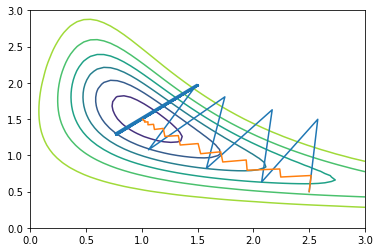

In [91]:
print('minimum of f : x = ', x)

plt.contour(X,Y,F)
plt.plot(trajectory_sd[0], trajectory_sd[1])
plt.plot(trajectory_ls[0], trajectory_ls[1])